In [117]:
#import necessary libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [118]:
#read in the data
airline = pd.read_csv("D:\\Kimberly\\top_ports_lines.csv")
airline['cancelled'] = airline['cancelled'].map({1:0, 2:1})

In [119]:
#train-validation-test split
train, test = train_test_split(airline, test_size = .50, random_state = 123)
validation, test = train_test_split(test, test_size = .20, random_state= 123)
print(airline.shape)
print(train.shape)
print(validation.shape)
print(test.shape)
print(airline.columns)

(1672943, 69)
(836471, 69)
(669177, 69)
(167295, 69)
Index(['year', 'quarter', 'month', 'dayof_month', 'day_of_week', 'flight_date',
       'marketing_airline_network', 'operated_or_branded_code_share_partners',
       'dot_id_marketing_airline', 'iata_code_marketing_airline',
       'flight_number_marketing_airline', 'operating_airline',
       'dot_id_operating_airline', 'iata_code_operating_airline',
       'tail_number', 'flight_number_operating_airline', 'origin_airport_id',
       'origin_airport_seq_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_state', 'origin_state_fips',
       'origin_state_name', 'origin_wac', 'dest_airport_id',
       'dest_airport_seq_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_state', 'dest_state_fips', 'dest_state_name', 'dest_wac',
       'crs_dep_time', 'dep_time', 'dep_delay', 'dep_delay_minutes',
       'dep_del15', 'departure_delay_groups', 'dep_time_blk', 'taxi_out',
       'wheels_off', 'wheels_o

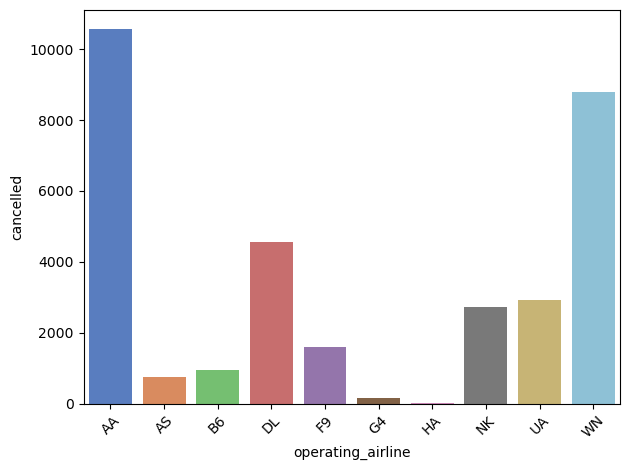

In [120]:
#barplot of cancellations by airline
#group and sum cancellations
cancelled_by_airline = airline.groupby('operating_airline')['cancelled'].sum().reset_index()

#plot using seaborn
sns.barplot(x="operating_airline", y="cancelled", hue = 'operating_airline', data=cancelled_by_airline, palette = 'muted')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [121]:
#Group total flights and cancelled flights per airline
total_flights = airline.groupby('operating_airline').size()
cancelled_flights = airline.groupby('operating_airline')['cancelled'].sum()

# Create DataFrame with cancellation rate
cancelled_by_airline = pd.DataFrame({
    'Total Flights': total_flights,
    'Cancelled Flights': cancelled_flights
}).reset_index()

cancelled_by_airline['Cancellation Rate'] = cancelled_by_airline['Cancelled Flights'] / cancelled_by_airline['Total Flights']

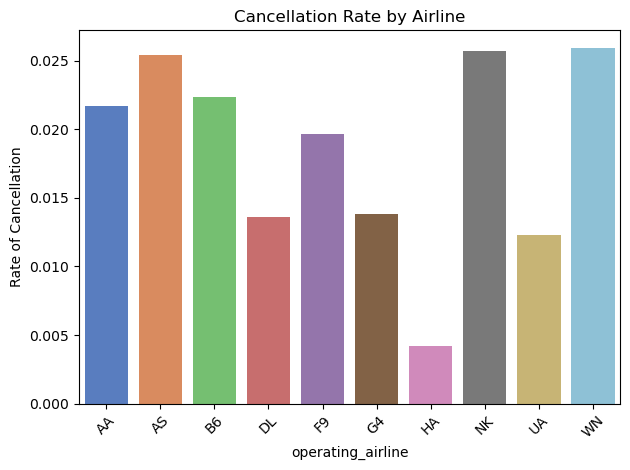

In [122]:
sns.barplot(
    x="operating_airline",
    y="Cancellation Rate",
    hue = "operating_airline",
    data=cancelled_by_airline,
    palette="muted"
)
plt.title('Cancellation Rate by Airline')
plt.ylabel('Rate of Cancellation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

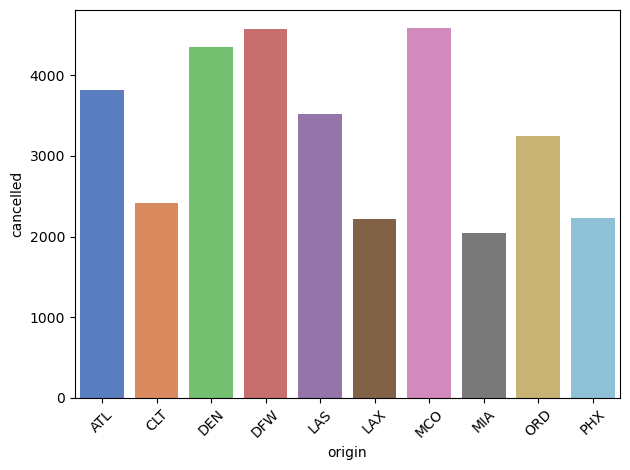

In [123]:
#barplot of cancellations by airport
#group and sum cancellations
cancelled_by_airport = airline.groupby('origin')['cancelled'].sum().reset_index()

#plot using seaborn
sns.barplot(x="origin", y="cancelled", hue = 'origin', data=cancelled_by_airport, palette = 'muted')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [124]:
#Group total flights and cancelled flights per airport
total_flights2 = airline.groupby('origin').size()
cancelled_flights2 = airline.groupby('origin')['cancelled'].sum()

#Create DataFrame with cancellation rate
cancelled_by_airport = pd.DataFrame({
    'Total Flights': total_flights2,
    'Cancelled Flights': cancelled_flights2
}).reset_index()

cancelled_by_airport['Cancellation Rate'] = cancelled_by_airport['Cancelled Flights'] / cancelled_by_airport['Total Flights']

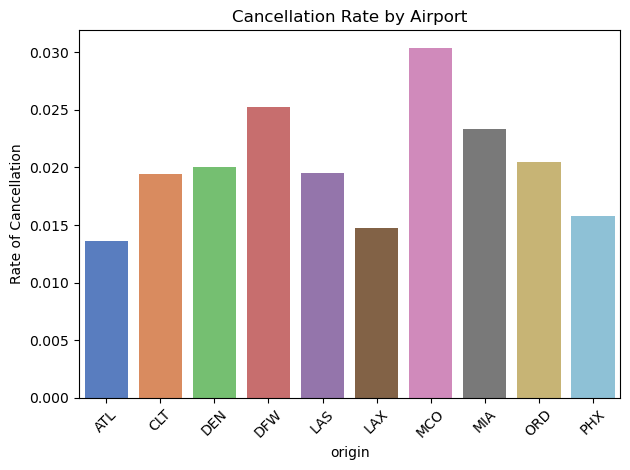

In [125]:
sns.barplot(
    x="origin",
    y="Cancellation Rate",
    hue = "origin",
    data=cancelled_by_airport,
    palette="muted"
)
plt.title('Cancellation Rate by Airport')
plt.ylabel('Rate of Cancellation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [126]:
count_carrier = len(airline[(airline['cancelled'] == 1) & (airline['carrier_delay'] == 1)])
count_carrier = len(airline[(airline['cancelled'] == 1) & (airline['weather_delay'] == 1)])
count_carrier = len(airline[(airline['cancelled'] == 1) & (airline['nas_delay'] == 1)])
count_carrier = len(airline[(airline['cancelled'] == 1) & (airline['security_delay'] == 1)])
count_carrier = len(airline[(airline['cancelled'] == 1) & (airline['late_aircraft_delay'] == 1)])

In [129]:
#read in the data
final_dta = pd.read_csv("D:\\Kimberly\\final_dta.csv")
final_dta['cancelled'] = final_dta['cancelled'].map({1:0, 2:1})

In [130]:
#Calculate counts
counts = {
    'Carrier Delay': len(final_dta[(final_dta['crs_dep_hour'] == 22) & (final_dta['carrier_delay'] > 0)]),
    'Weather Delay': len(final_dta[(final_dta['crs_dep_hour'] == 22) & (final_dta['weather_delay'] > 0)]),
    'NAS Delay': len(final_dta[(final_dta['crs_dep_hour'] == 22) & (final_dta['nas_delay'] > 0)]),
    'Security Delay': len(final_dta[(final_dta['crs_dep_hour'] == 22) & (final_dta['security_delay'] > 0)]),
    'Late Aircraft Delay': len(final_dta[(final_dta['crs_dep_hour'] == 22) & (final_dta['late_aircraft_delay'] > 0)])
}

#Convert to DataFrame
delay_df = pd.DataFrame(list(counts.items()), columns=['Delay Type', 'Cancelled Count'])

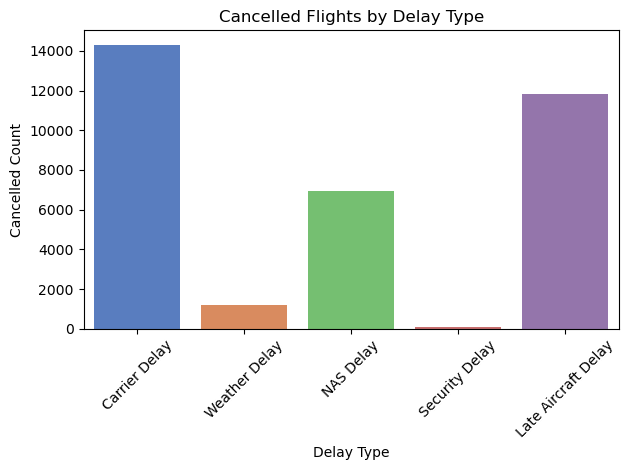

In [131]:
sns.barplot(x='Delay Type', y='Cancelled Count', data=delay_df, hue = 'Delay Type', palette='muted')
plt.title('Cancelled Flights by Delay Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [132]:
#Calculate counts
counts = {
    'Carrier Delay': len(final_dta[(final_dta['crs_dep_hour'] == 23) & (final_dta['carrier_delay'] > 0)]),
    'Weather Delay': len(final_dta[(final_dta['crs_dep_hour'] == 23) & (final_dta['weather_delay'] > 0)]),
    'NAS Delay': len(final_dta[(final_dta['crs_dep_hour'] == 23) & (final_dta['nas_delay'] > 0)]),
    'Security Delay': len(final_dta[(final_dta['crs_dep_hour'] == 23) & (final_dta['security_delay'] > 0)]),
    'Late Aircraft Delay': len(final_dta[(final_dta['crs_dep_hour'] == 23) & (final_dta['late_aircraft_delay'] > 0)])
}

#Convert to DataFrame
delay_df = pd.DataFrame(list(counts.items()), columns=['Delay Type', 'Cancelled Count'])

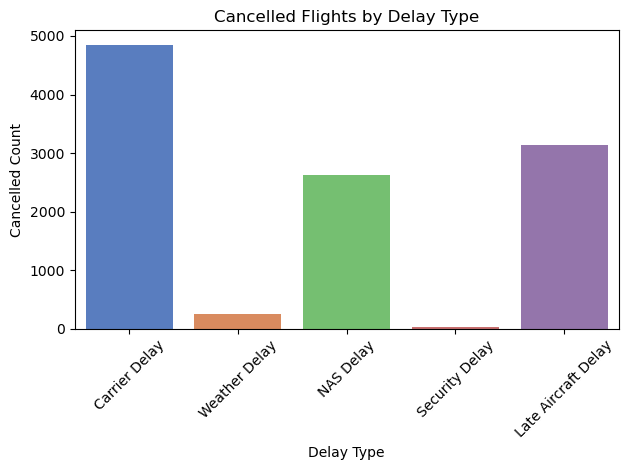

In [133]:
sns.barplot(x='Delay Type', y='Cancelled Count', data=delay_df, hue = 'Delay Type', palette='muted')
plt.title('Cancelled Flights by Delay Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Group total flights and delayed flights per airline
total_flights = airline.groupby('operating_airline').size()
delayed_flights = airline.groupby('operating_airline')['dep_del15'].sum()

# Create DataFrame with cancellation rate
delayed_by_airline = pd.DataFrame({
    'Total Flights': total_flights,
    'Delayed Flights': delayed_flights
}).reset_index()

delayed_by_airline['Delayed Rate'] = delayed_by_airline['Delayed Flights'] / delayed_by_airline['Total Flights']

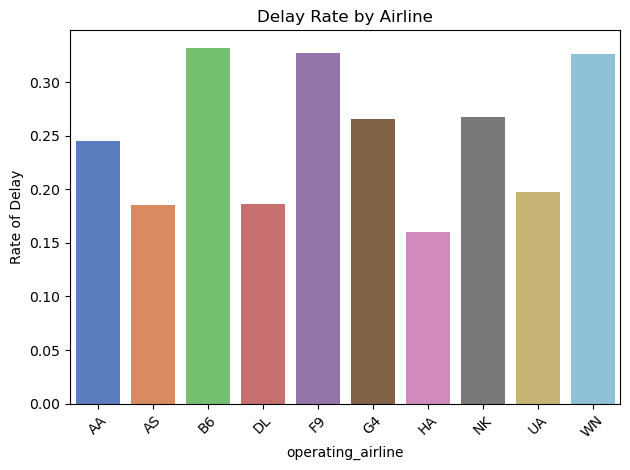

In [ ]:
sns.barplot(
    x="operating_airline",
    y="Delayed Rate",
    hue = "operating_airline",
    data=delayed_by_airline,
    palette="muted"
)
plt.title('Delay Rate by Airline')
plt.ylabel('Rate of Delay')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Group total flights and delayed flights per airport
total_flights2 = airline.groupby('origin').size()
delayed_flights2 = airline.groupby('origin')['dep_del15'].sum()

#Create DataFrame with cancellation rate
delayed_by_airport = pd.DataFrame({
    'Total Flights': total_flights2,
    'Delayed Flights': delayed_flights2
}).reset_index()

delayed_by_airport['Delay Rate'] = delayed_by_airport['Delayed Flights'] / delayed_by_airport['Total Flights']

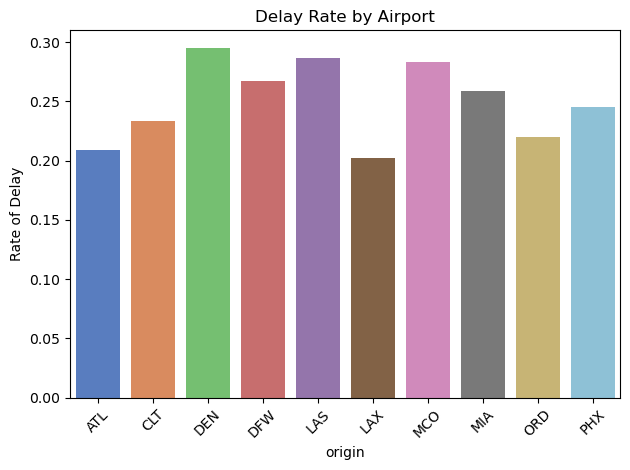

In [ ]:
sns.barplot(
    x="origin",
    y="Delay Rate",
    hue = "origin",
    data=delayed_by_airport,
    palette="muted"
)
plt.title('Delay Rate by Airport')
plt.ylabel('Rate of Delay')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()